# PHSY134 - Workshop 2: Data analysis exercise

In this exercise you will explore a dataset by plotting the information in different ways. You should spend approximately two hours on this exercise. You must make notes in your OneNote logbook as you go.

Your logbook should include the following:
* A concise introduction. What are you being asked to do?
* Regular timestamps and a record of what you are doing. Include any important equations.
* A copy of the code that you use at each stage and a description of how you arrived at the solution. For example, you might explain how you modified some of the code from other notebooks, and discuss your reasons for presenting the data in a particular way.
* Copies of any graphs that you produce and any comments on what they show.
* Estimates for the uncertainy of any values that you derive from the data. Explain how you estimated the uncertainties.
* Conclusions that describe the overall aim of the exercise, a summary of how you answered the questions, a critical reflection on the quality and clarity of your graphs and suggestions for how they could be improved.

## Data analysis exercise

You will need an example data file to complete this exercise. 
We will first generate the file `Workshop_data_Week17.csv`. The data is generated by some python code but we are going to pretend that it came from a real measurement of an electronic circuit.

In [1]:
from generate_week17_data import generate_week17_file
_  = generate_week17_file()

Enter your student ID (as a number): 39047415
SUCCESS: Workshop_data_Week17.csv generated and saved



We are going to interpret the data as if it represents measurements of the voltage across a resistor as a function of time. The value of the resistor is $(4.7\pm0.1)\,\mathrm{k\Omega}$. The first column of values in the data file are times, with units of seconds. The second column of values are voltages, with units of volts. 

In this imaginary experiment, the resistor is part of an oscillating circuit. We are not concerned with the other components used to build this circuit but we are going to try to learn something about how the circuit behaves from the data. During the workshop, you should aim to determine:
1. The current flowing through the resistor as a function of time.
2. The frequency at which the circuit oscillates.
3. The uncertainty in the voltage measurement and, hence, the uncertainty in the current through the resistor.
3. The characteristic time on which the oscillations decay and the shape of this decay.

The notes below will guide you through each step. Make notes in your logbook as you go and include regular timestamps. You can add your code to this notebook or create a new one. Your jupyter notebooks do not need to be submitted. **Only your logbook will be assessed. Your logbook should include a copy of any relevant code, graphs, results and discussion** (as detailed above).

### Load and plot the data

The file `Workshop_data_Week17.csv` contains a two-dimensional array of values stored in a comma-separated-variable format.
* The first column of values are times with units of seconds,
* the second column of values are voltages with units of volts.

Complete the following three steps:

1. Use the function `np.loadtxt()` to load the data stored in the file `Workshop_data_Week17.csv`. The function `np.loadtxt()` should return a two-dimensional array of values. You will need to assign this array to a new variable so that you can use it in the next step.

2. Use slice indexing to extract the list of times (the first column) from the array and assign this to a new variable. Similarly, extract the list of voltages (the second column of array) and assign it to another new variable.

3. Create a new graph of voltage as a function of time.

*Hint 1: the file contains quite a large number of points. You may need to make the figure quite wide to see what is going on.*

*Hint 2: try plotting the data using just points (format string `'.'`) and just lines (format string `'-'`). Think about which is more helpful for understanding the data.*

*Hint 3: think about scaling your data into sensible units. For example, if all of your voltages are of the order $10^{-9}\,\mathrm{V}$ then it would be sensible to convert the values to $nV$ (nano volts) by multiplying your array of voltages by 1e9. Don't forget to indicate units on your graph axes.*

### What current is flowing through the resistor?

The voltage across a resistor and the current flowing through it are related by by Ohm's law:

$$ V = I R$$

From Ohm's law, and the known value of the resistance, create a graph of current through the resistor as a function of time.

### What is the frequency of the oscillation?

At the start of the data you should see a oscillating voltage with a decaying amplitude. 

Try to determine the frequency of the oscillation

1. Create a new graph that shows voltage as a function of time, but only over the range of times where the oscillation is clear.

2. By counting periods, or otherwise, estimate the frequency of the oscillation.

*Hint: it may be helpful to draw some vertical lines on the plot to locate parts of the oscillation with good precision. You can draw a vertical line using `plt.plot()` by giving it a pair of identical x values and a pair of y values that set the height of the line. For example, `plt.plot([0.1, 0.1], [-50, 50], '-k')` will draw a black, vertical line from `-50` to `50` on the vertical axis at the position `0.1` on the horizontal axis.*

### What is happening at the end of the data?

You should see that the voltages at the end of the data set are dominated by random measurement uncertainty: the oscillations are no longer visible. The scale of these fluctuations tell us about measurement uncertainty Let's quantify this uncertainty.

1. Create a new graph that shows voltage as a function of time, but only over the range of times where the voltage appears to be dominated by measurement uncertainty.

2. Once you have determined a suitable range of times, save the voltages in this range to a new array.

3. Create a histogram of the voltages. 

4. Use the width of your histogram to estimate the size of the uncertainty.

### How quickly is the oscillation decaying?

It is very common to find that an oscillation will decay because energy is being lost from the oscillating system to the outside world (damping). If this is the case for our system, then it would make sense to look at the decay of energy or power rather than voltage.

The power $P$ dissipated in a resistor is given by 
$$P = IV = I^2 R = V^2 / R$$

In the simplest picture of a damped oscillator, the peak power should decay exponentially with time. In other words, the peak power should be proportional to $\exp(-t/\tau)$, where $\tau$ is the characteristic time or *time constant*.

1. Calculate the power dissipated in the resistor as a function of time and plot it on a graph.
2. By plotting an exponential decay on the same graph (or otherwise) determine whether the decay in power can be described well by an exponential decay.
3. Determine the characteristic timescale for the decay of power disspated in the resistor.

If you have time,

4. Convert the uncertainty in the measured voltage that you found above and convert it into an uncertainty in the power dissipated in the resistor. Can you use this value to accurately determine the time at which the oscillations can no longer be observed due to measurement uncertainty?

### Conclusions

Summarise what you found during the exercise and how you answered the questions. Include any numerical results that you found. Include a critical reflection on the quality and clarity of your graphs and suggestions for how they could be improved.

[[ 0.00000000e+00  4.43002265e-01]
 [ 4.13394979e-02  5.47132196e-01]
 [ 8.26789958e-02  6.90471022e-01]
 ...
 [ 3.20794504e+01 -1.84526906e-03]
 [ 3.21207899e+01 -4.60362925e-02]
 [ 3.21621294e+01 -3.88985708e-02]]


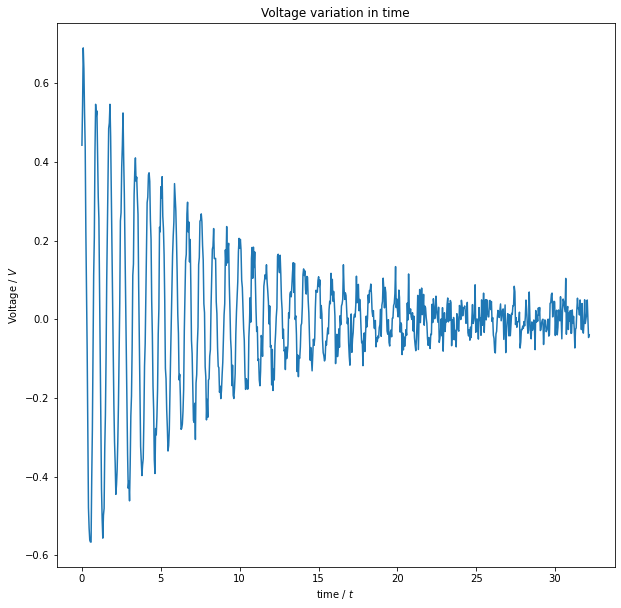

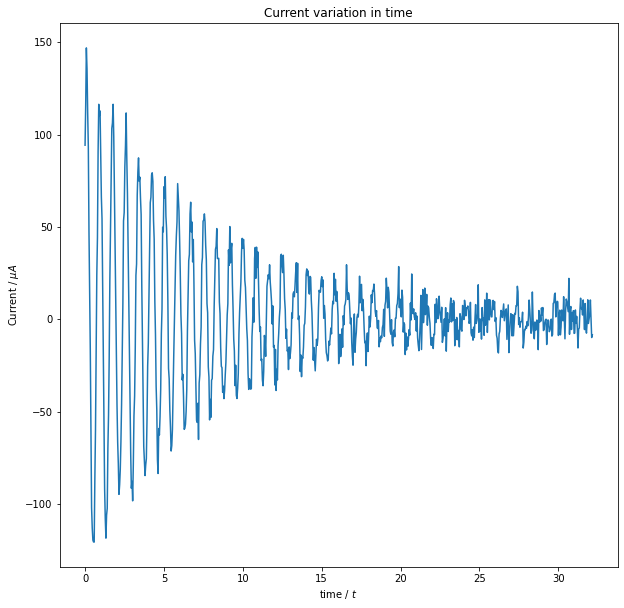

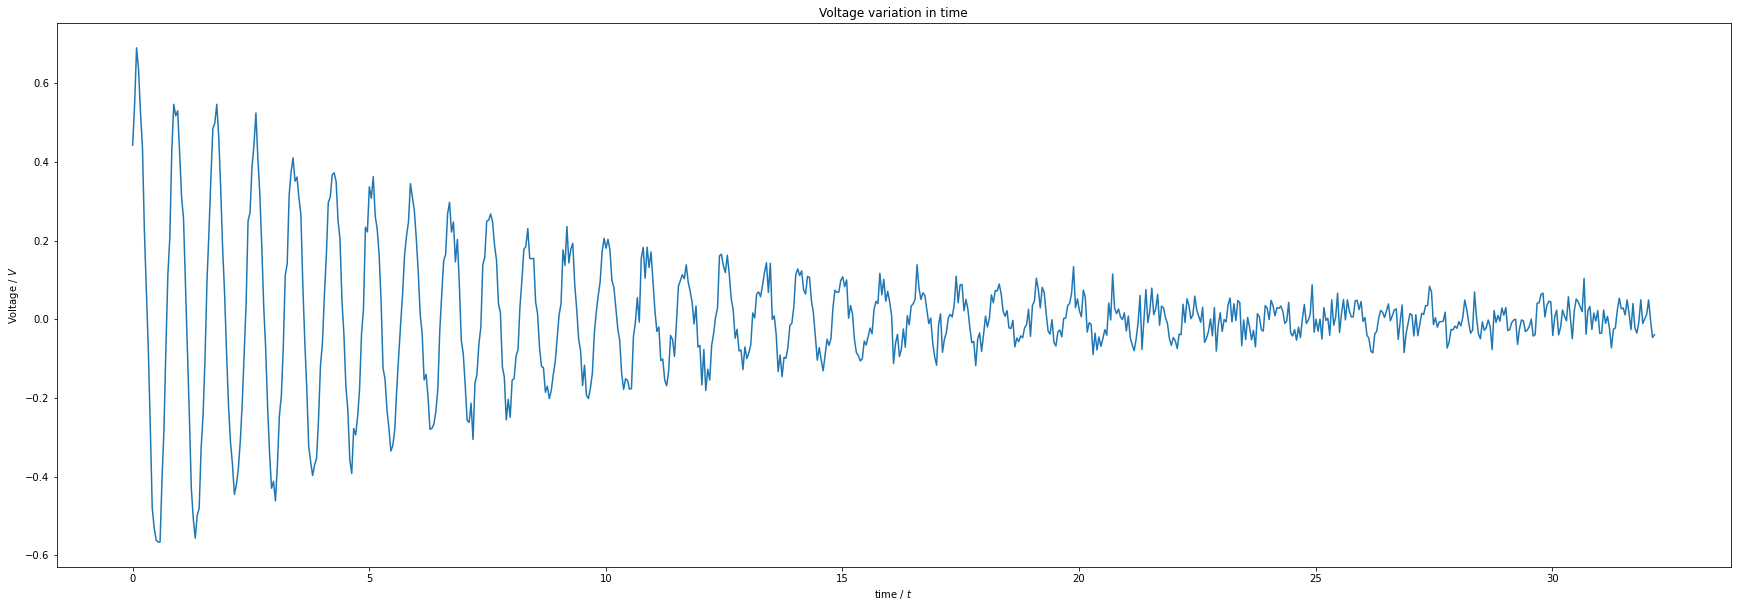

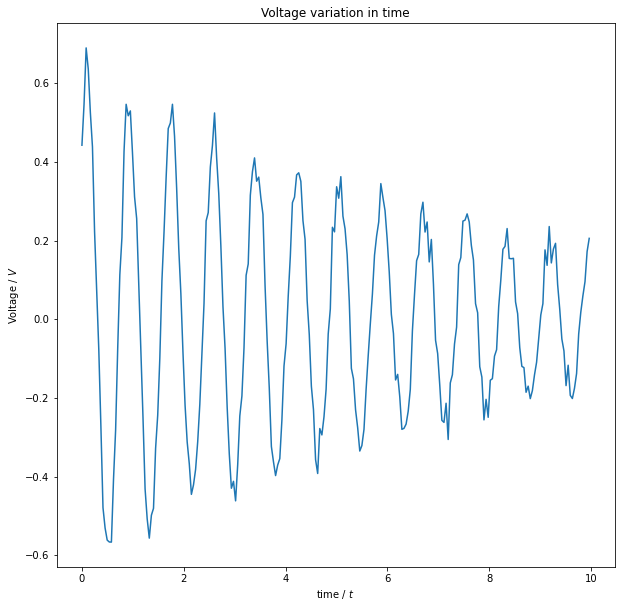

Text(0.5, 1.0, 'Distribution of random voltages')

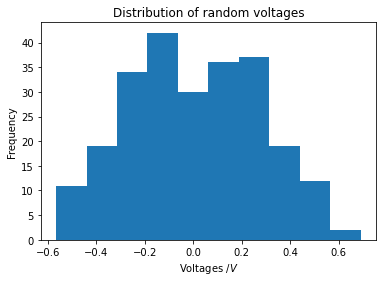

In [95]:
import numpy as np
import matplotlib.pyplot as plt

array2d = np.loadtxt("Workshop_data_Week17.csv", delimiter=',')
print(array2d)

Time = array2d[:,0]
Voltage = array2d[:,1:]

plt.figure(figsize=(10,10))
plt.plot(Time, Voltage, '-')
plt.xlabel('time / $t$')
plt.ylabel('Voltage / $V$')
plt.title('Voltage variation in time')
plt.show()

Current = array2d[:,1:] / 0.0047
plt.figure(figsize=(10,10))
plt.plot(Time, Current, '-')
plt.xlabel('time / $t$')
plt.ylabel('Current / $\mu A$')
plt.title('Current variation in time')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(Time, Voltage, '-')
plt.xlabel('time / $t$')
plt.ylabel('Voltage / $V$')
plt.title('Voltage variation in time')
plt.show()

Time_2 = array2d[0:242: ,0] 
Voltage_2 = array2d[0:242:,1:]
plt.figure(figsize=(10,10))
plt.plot(Time_2, Voltage_2, '-')
plt.xlabel('time / $t$')
plt.ylabel('Voltage / $V$')
plt.title('Voltage variation in time')
plt.show()

plt.hist(Voltage_2)
plt.xlabel('Voltages /$V$')
plt.ylabel('Frequency')
plt.title("Distribution of random voltages")

Text(0.5, 1.0, 'Distribution of random voltages')

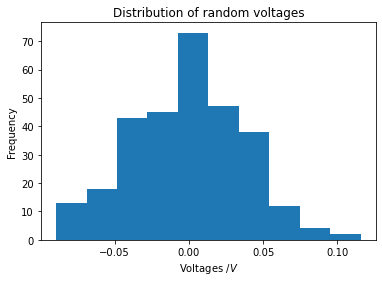

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

array2d = np.loadtxt("Workshop_data_Week17.csv", delimiter=',')
new_array2d = array2d[484:] 

Time_3 = array2d[:,0]
Voltage_3 = new_array2d[:,1:]


plt.hist(Voltage_3)
plt.xlabel('Voltages /$V$')
plt.ylabel('Frequency')
plt.title("Distribution of random voltages")


